In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Load and perform neccessary cleaning and summary of the Transaction Dataset**

In [74]:
df_transaction = pd.read_excel("QVI_transaction_data.xlsx")
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [75]:
df_transaction.shape

(264836, 8)

In [76]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


**The .info() summary confirms the dataset contains 264,836 transaction records with no missing values across any of the columns. All data types are appropriate for their respective columns, with the notable exception of the DATE column, which has been incorrectly parsed as an integer (int64). The immediate next step is to convert this column to a proper datetime format to enable time-series analysis.**

In [77]:
# Convert Excel date integers to datetime objects
df_transaction['DATE'] = pd.to_datetime(df_transaction['DATE'], unit='D', origin='1899-12-30')

print(df_transaction['DATE'].head(15))

0    2018-10-17
1    2019-05-14
2    2019-05-20
3    2018-08-17
4    2018-08-18
5    2019-05-19
6    2019-05-16
7    2019-05-16
8    2018-08-20
9    2018-08-18
10   2019-05-17
11   2018-08-20
12   2019-05-18
13   2018-08-17
14   2019-05-15
Name: DATE, dtype: datetime64[ns]


In [78]:
df_transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


**A review of the descriptive statistics provides a clearer understanding of the dataset's scope and characteristics:-**

**Confirmed Transaction Period: The DATE column now shows a clear time range. Earliest Transaction (min): 2018-07-01. Latest Transaction (max): 2019-06-30
This confirms the dataset covers exactly one full year, providing a robust basis for analyzing annual trends, seasonality, and customer purchasing cycles.**

**Persistent Outliers Identified: The statistics for transactional values remain consistent with our initial findings and require direct action.**

**PROD_QTY: The maximum quantity purchased in a single transaction is 200. This is a significant outlier compared to the mean (1.9) and the 75th percentile (2.0), and it must be investigated to determine if it is a valid transaction or an error.
TOT_SALES: The maximum total sale is $650.00, which is directly correlated with the quantity outlier. Its presence will skew any analysis of average customer spend.**

In [79]:
#Investigate the PROD_QTY outlier
outlier_transactions = df_transaction[df_transaction['PROD_QTY'] == 200]
print("Displaying transaction(s) with a PROD_QTY of 200:")
print(outlier_transactions)

Displaying transaction(s) with a PROD_QTY of 200:
            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [80]:
#Examine all transactions for the outlier customer
customer_226000_transactions = df_transaction[df_transaction['LYLTY_CARD_NBR'] == 226000]
print(customer_226000_transactions)


print(f"\nTotal number of transactions for this customer: {len(customer_226000_transactions)}")

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  

Total number of transactions for this customer: 2


**The output confirms that customer 226000 has only two transactions in the entire year-long dataset and both of them are these massive bulk purchases. It tells us this is not a regular customer who made two unusual purchases**

**This customer is almost certainly not a household consumer. The purchasing pattern strongly suggests:**

**A Business Owner: Someone stocking up for a small shop, cafe, or vending machine.**

**Event Purchasing: Buying supplies for a large party, a community event, or a fundraiser.**

**We will remove all data related to LYLTY_CARD_NBR 226000 from our analysis dataset because this customer would contaminate our dataset and lead to misleading insights about the general customer base.**

In [81]:
#Remove the outlier customer's data 
df_transaction_cleaned = df_transaction[df_transaction['LYLTY_CARD_NBR'] != 226000]
print("Cleaned DataFrame shape:  ", df_transaction_cleaned.shape)
print(f"Number of rows removed: {df_transaction.shape[0] - df_transaction_cleaned.shape[0]}")


Cleaned DataFrame shape:   (264834, 8)
Number of rows removed: 2


In [82]:
df_transaction_cleaned.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,2018-12-30 00:52:10.292938240,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241


**Feature Engineering:- we need to extract useful information that is currently "hidden" inside the PROD_NAME column.**

In [83]:
#some unique product names to understand the pattern
df_transaction_cleaned['PROD_NAME'].unique()[:10]

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G'], dtype=object)

In [84]:
# Use a regular expression to extract the numbers from the product name
df_transaction_cleaned['PACK_SIZE'] = df_transaction_cleaned['PROD_NAME'].str.extract(r'(\d+)').astype(float)

C:\Users\kvire\AppData\Local\Temp\ipykernel_17008\3403904722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transaction_cleaned['PACK_SIZE'] = df_transaction_cleaned['PROD_NAME'].str.extract(r'(\d+)').astype(float)


In [85]:
# DataFrame with new PACK_SIZE column
df_transaction_cleaned.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0


In [86]:
#Verifying the new column
df_transaction_cleaned[['PROD_NAME', 'PACK_SIZE']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 264834 entries, 0 to 264835
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   PROD_NAME  264834 non-null  object 
 1   PACK_SIZE  264834 non-null  float64
dtypes: float64(1), object(1)
memory usage: 6.1+ MB


In [87]:
# Summary of Pack Sizes
df_transaction_cleaned['PACK_SIZE'].describe()

count    264834.000000
mean        182.425512
std          64.325148
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE, dtype: float64

In [88]:
def find_brand_name(product_name):
    known_brands = ['Red Rock Deli', 'Natural Chip Co', 'Old El Paso', 'Grain Waves', 'Kettle', 'Smiths', 'Doritos', 'Pringles', 'Thins', 'Tostitos', 'Twisties', 'CCs', 'Tyrrells', 'Infuzions', 'Sunbites', 'Cheezels', 'Cobs', 'Woolworths']
    product_name_title = product_name.title()
    for brand in known_brands:
        if brand in product_name_title:
            return brand
    if 'Natural Chip Compny' in product_name_title:     # The key change is to handle the typo for 'Natural Chip Compny'
        return 'Natural Chip Co'
    return product_name.split()[0]



df_transaction_cleaned['BRAND_NAME'] = df_transaction_cleaned['PROD_NAME'].apply(find_brand_name)

C:\Users\kvire\AppData\Local\Temp\ipykernel_17008\1220132241.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transaction_cleaned['BRAND_NAME'] = df_transaction_cleaned['PROD_NAME'].apply(find_brand_name)


In [89]:
brand_corrections = {
    'Dorito': 'Doritos',
    'Infzns': 'Infuzions',
    'Smith': 'Smiths',
    'Snbts': 'Sunbites',
    'Natural': 'Natural Chip Co',
    'NCC': 'Natural Chip Co',
    'Old': 'Old El Paso',         
    'Red': 'Red Rock Deli',       
    'RRD': 'Red Rock Deli',
    'Grain': 'Grain Waves',      
    'WW': 'Woolworths'
}

df_transaction_cleaned['BRAND_NAME'] = df_transaction_cleaned['BRAND_NAME'].replace(brand_corrections)

C:\Users\kvire\AppData\Local\Temp\ipykernel_17008\1385372162.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transaction_cleaned['BRAND_NAME'] = df_transaction_cleaned['BRAND_NAME'].replace(brand_corrections)


In [90]:
sorted(df_transaction_cleaned['BRAND_NAME'].unique())

['Burger',
 'CCs',
 'Cheetos',
 'Cheezels',
 'Cobs',
 'Doritos',
 'French',
 'Grain Waves',
 'GrnWves',
 'Infuzions',
 'Kettle',
 'Natural Chip Co',
 'Old El Paso',
 'Pringles',
 'Red Rock Deli',
 'Smiths',
 'Sunbites',
 'Thins',
 'Tostitos',
 'Twisties',
 'Tyrrells',
 'Woolworths']

In [91]:
df_transaction_cleaned.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle


In [92]:
# Create a filter for all rows where the product name contains the word "Natural"
natural_products_df = df_transaction_cleaned[df_transaction_cleaned['PROD_NAME'].str.contains('Natural', case=False)]

print("Unique brand names assigned to products containing 'Natural':")
print(natural_products_df['BRAND_NAME'].unique())

print("\n--- Sample of 'Natural' products and their assigned brands ---")
print(natural_products_df[['PROD_NAME', 'BRAND_NAME']].head(10))

Unique brand names assigned to products containing 'Natural':
['Natural Chip Co']

--- Sample of 'Natural' products and their assigned brands ---
                                   PROD_NAME       BRAND_NAME
0     Natural Chip        Compny SeaSalt175g  Natural Chip Co
40    Natural ChipCo      Hony Soy Chckn175g  Natural Chip Co
75   Natural Chip Co     Tmato Hrb&Spce 175g  Natural Chip Co
214  Natural Chip Co     Tmato Hrb&Spce 175g  Natural Chip Co
234   Natural ChipCo      Hony Soy Chckn175g  Natural Chip Co
314   Natural Chip        Compny SeaSalt175g  Natural Chip Co
315  Natural Chip Co     Tmato Hrb&Spce 175g  Natural Chip Co
411  Natural Chip Co     Tmato Hrb&Spce 175g  Natural Chip Co
429  Natural Chip Co     Tmato Hrb&Spce 175g  Natural Chip Co
473   Natural Chip        Compny SeaSalt175g  Natural Chip Co


**Load and perform neccessary cleaning and summary of the Purchase Behaviour Dataset**

In [93]:
df_customer = pd.read_csv("QVI_purchase_behaviour.csv")
df_customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [94]:
df_customer.shape

(72637, 3)

In [95]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [96]:
df_customer.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [97]:
# Unique Values in LIFESTAGE
df_customer['LIFESTAGE'].value_counts()

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

In [98]:
# Unique Values in PREMIUM_CUSTOMER
df_customer['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

**Merge Transaction and Customer Data**

In [99]:
# Perform an inner merge on the LYLTY_CARD_NBR column
df_merged = pd.merge(df_transaction_cleaned, df_customer, on='LYLTY_CARD_NBR', how='inner')

In [100]:
df_merged.shape

(264834, 12)

In [101]:
df_merged.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND_NAME          0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [102]:
df_merged.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [103]:
# Save the Cleaned and Merged Data
df_merged.to_csv('QVI_fully_cleaned_data.csv', index=False)
print("Successfully saved the fully cleaned and merged data to 'QVI_fully_cleaned_data.csv'")


Successfully saved the fully cleaned and merged data to 'QVI_fully_cleaned_data.csv'


**Remove Non-Chip Products (Salsa)**

In [104]:
salsa_rows = df_merged[df_merged['PROD_NAME'].str.contains('salsa', case=False)]
print(f"Found {len(salsa_rows)} transactions involving salsa products.")

df_final_analysis = df_merged[~df_merged['PROD_NAME'].str.contains('salsa', case=False)].copy()



print(f"Original merged shape: {df_merged.shape}")
print(f"Shape after removing salsa: {df_final_analysis.shape}")

Found 18094 transactions involving salsa products.
Original merged shape: (264834, 12)
Shape after removing salsa: (246740, 12)


**Time Series Analysis**

In [109]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

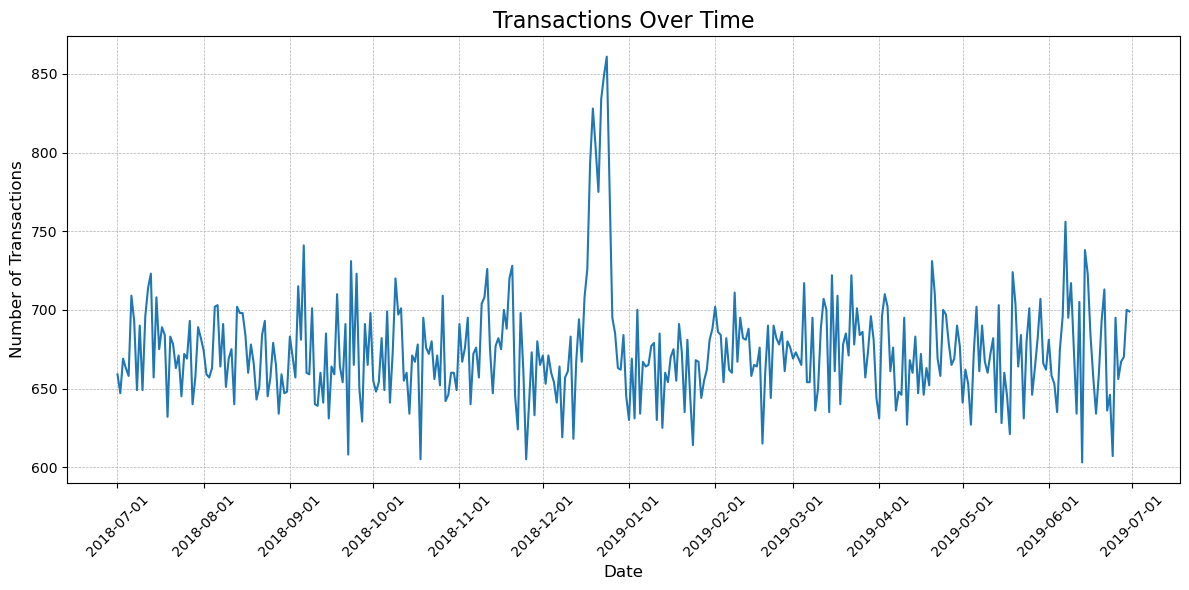

In [110]:
transactions_by_day = df_final_analysis.groupby('DATE')['TXN_ID'].nunique()

# Step 2: Create the plot.
plt.figure(figsize=(12, 6))
plt.plot(transactions_by_day.index, transactions_by_day.values)

# Step 3: Format the plot to make it look professional.
plt.title('Transactions Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Improve the x-axis date formatting
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # Tick every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # Format as YYYY-MM-DD
plt.xticks(rotation=45) 

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

**Key Finding: The business experiences a stable, consistent sales rhythm for most of the year, with a dramatic and significant spike in transactions during the month of December.**

**Insight: This confirms a strong seasonal sales pattern driven by the pre-Christmas holiday period. The peak activity occurs in the 10-14 days leading up to Christmas Eve, which is the most critical sales window of the year. A sharp drop on December 25th confirms the store is closed for the holiday.**

**Zoom in on December**

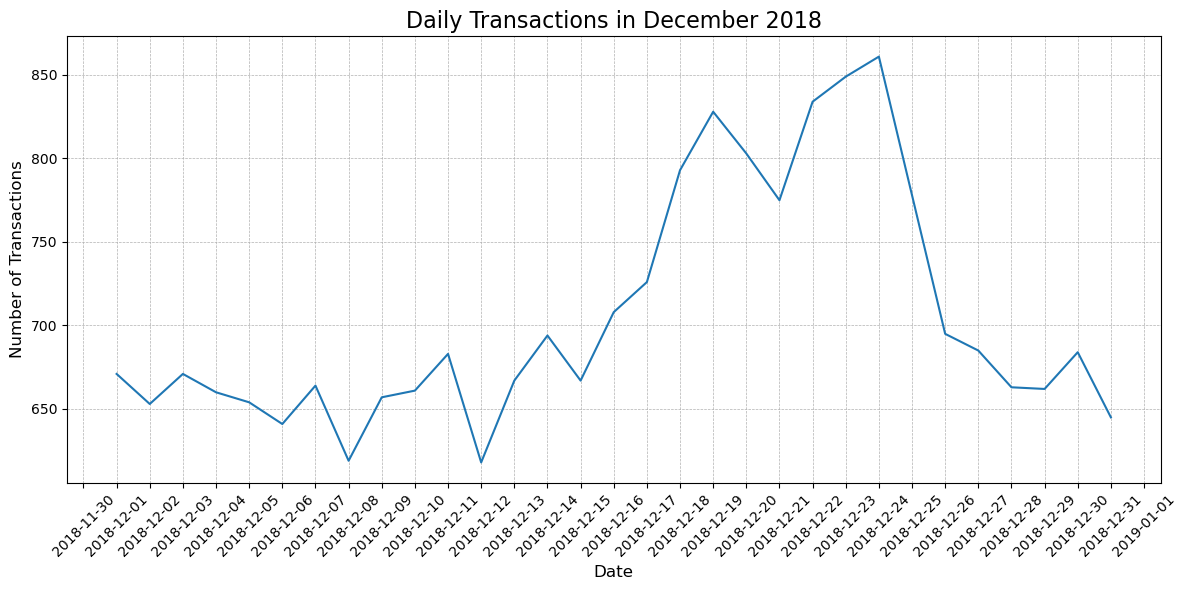

In [111]:
december_transactions = transactions_by_day[transactions_by_day.index.month == 12]

# Step 2: Create the plot.
plt.figure(figsize=(12, 6))
plt.plot(december_transactions.index, december_transactions.values)

# Step 3: Format the plot.
plt.title('Daily Transactions in December 2018', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Format the x-axis to show every day.
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Tick every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Key Finding: The zoomed-in plot of December transactions reveals a clear and predictable holiday shopping pattern. Sales begin a steady and rapid climb around the middle of the month (approx. Dec 15th), reaching their absolute peak on December 23rd and 24th.**
    
**Insight: This confirms that the general "December spike" seen in the annual chart is overwhelmingly driven by last-minute Christmas preparations. The days immediately preceding Christmas Eve are the most intense shopping period for this category.**
    
**Christmas Day Confirmation: The chart clearly shows a data point with zero (or near-zero) transactions on December 25th, which definitively confirms the store is closed for the holiday. This is followed by a significant lull for several days as shopping returns to normal levels.**

**Customer Segment Analysis**

**Sales by Customer Segment**

<Figure size 1400x800 with 0 Axes>

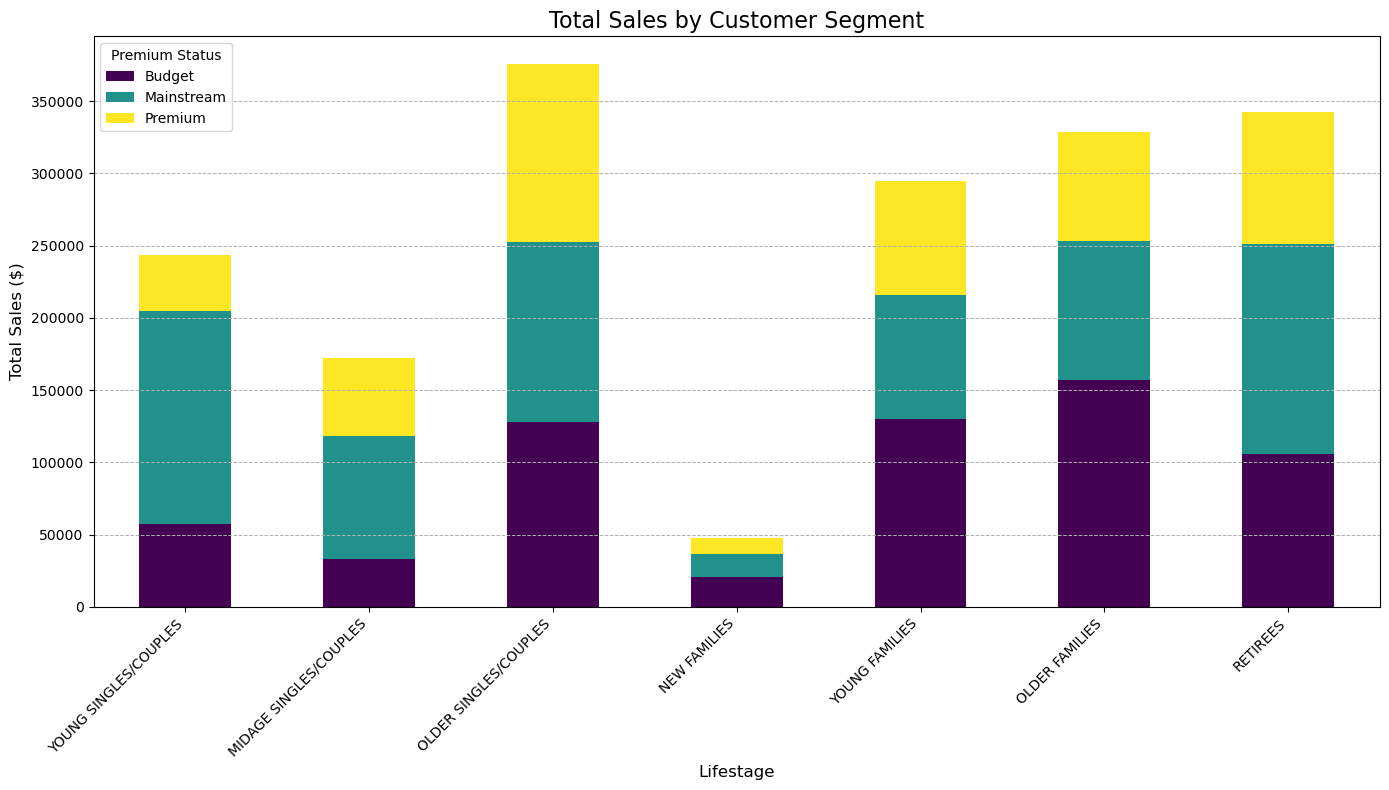

In [113]:
sales_by_segment = df_final_analysis.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

pivoted_sales = sales_by_segment.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='TOT_SALES')

# Reorder the lifestages to be more logical
lifestage_order = [
    'YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES', 'OLDER SINGLES/COUPLES',
    'NEW FAMILIES', 'YOUNG FAMILIES', 'OLDER FAMILIES', 'RETIREES'
]
pivoted_sales = pivoted_sales.reindex(lifestage_order)

# Step 3: Create the stacked bar chart.
plt.figure(figsize=(14, 8))
pivoted_sales.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Step 4: Format the plot.
plt.title('Total Sales by Customer Segment', fontsize=16)
plt.xlabel('Lifestage', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better fit
plt.legend(title='Premium Status')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

plt.show()

**Key Finding: The majority of revenue is generated by three key lifestages: Older Singles/Couples, Retirees, and Older Families.**

**Insight: Within these lifestages, the most valuable sub-segments are Budget - Older Families, Mainstream - Retirees, and Mainstream - Young Singles/Couples. This tells us that the "Premium" customer tier is not the primary driver of chip sales.**

**Customers by Segment**

<Figure size 1400x800 with 0 Axes>

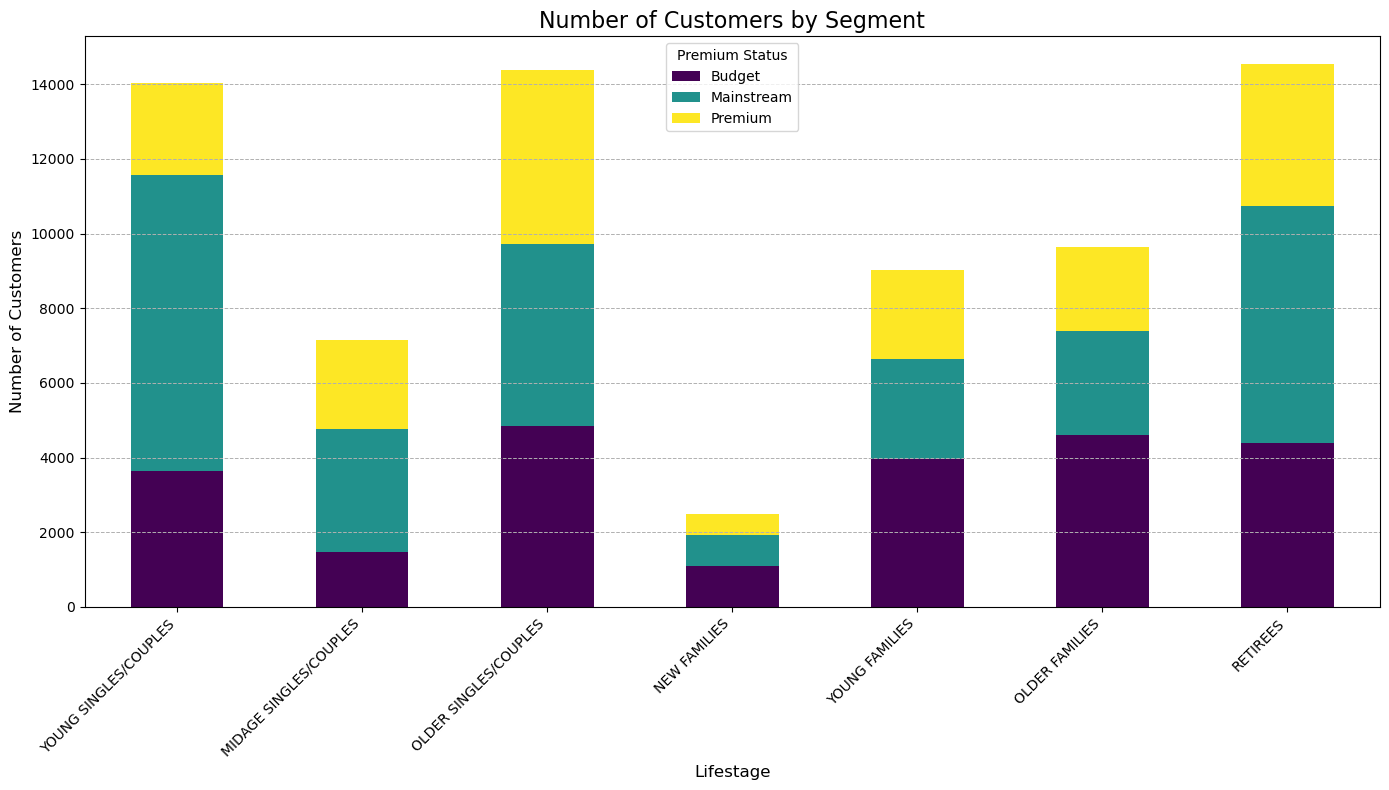

In [114]:
customers_by_segment = df_final_analysis.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

# Step 2: Pivot the data for the stacked bar chart.
pivoted_customers = customers_by_segment.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='LYLTY_CARD_NBR')

# Reorder the lifestages to match the previous chart
lifestage_order = [
    'YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES', 'OLDER SINGLES/COUPLES',
    'NEW FAMILIES', 'YOUNG FAMILIES', 'OLDER FAMILIES', 'RETIREES'
]
pivoted_customers = pivoted_customers.reindex(lifestage_order)

# Step 3: Create the stacked bar chart.
plt.figure(figsize=(14, 8))
pivoted_customers.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Step 4: Format the plot.
plt.title('Number of Customers by Segment', fontsize=16)
plt.xlabel('Lifestage', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Premium Status')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

plt.show()

**Key Finding: The distribution of the customer population does not perfectly mirror the distribution of sales. Segments like Mainstream - Young Singles/Couples and Mainstream - Older Singles/Couples have very large customer bases.**

**Insight: This reveals two different drivers of high sales. For some segments (like Mainstream Young Singles/Couples), high sales are a result of a large population. For others (like Budget - Older Families), high sales must be driven by higher spending per customer, as their population is not the largest.**

**Average Units per Transaction by Segment**

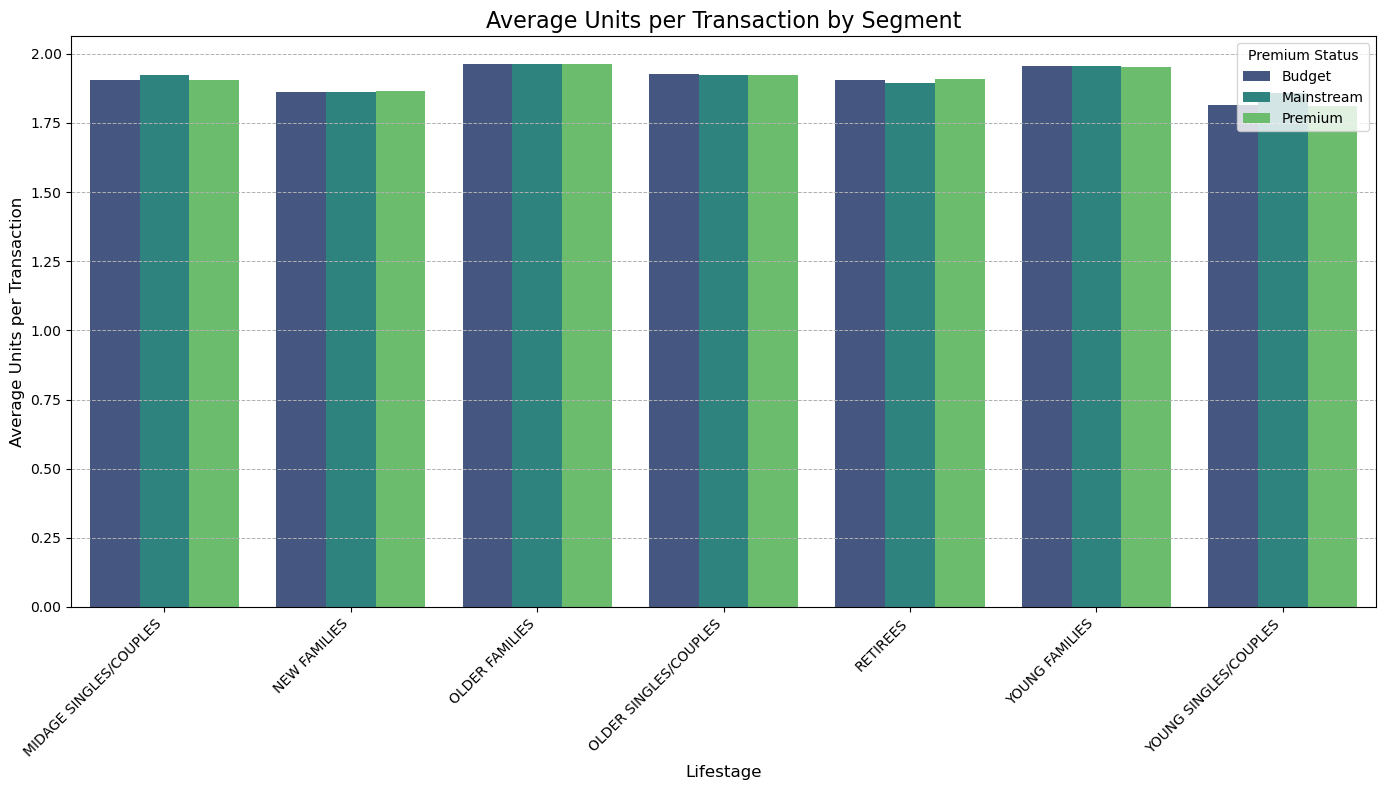

In [115]:
avg_units_by_segment = df_final_analysis.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_qty=('PROD_QTY', 'sum'),
    total_txns=('TXN_ID', 'nunique')
).reset_index()

avg_units_by_segment['AVG_UNITS'] = avg_units_by_segment['total_qty'] / avg_units_by_segment['total_txns']


# Step 2: Create the grouped bar chart.
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_units_by_segment, x='LIFESTAGE', y='AVG_UNITS', hue='PREMIUM_CUSTOMER', palette='viridis')

# Step 3: Format the plot.
plt.title('Average Units per Transaction by Segment', fontsize=16)
plt.xlabel('Lifestage', fontsize=12)
plt.ylabel('Average Units per Transaction', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Premium Status')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

plt.show()

**Key Finding: The average number of units purchased per transaction is remarkably consistent across all segments, hovering around 1.9 units. There is a slight, but not dramatic, tendency for "Young Families" and "Older Families" to purchase more units.**

**Insight: This finding largely rules out "buying in bulk" as the primary reason for the high value of segments like "Budget - Older Families." Since they aren't buying significantly more bags, their higher total spend must be coming from buying more expensive bags.**

**Average Price per Unit by Segment**

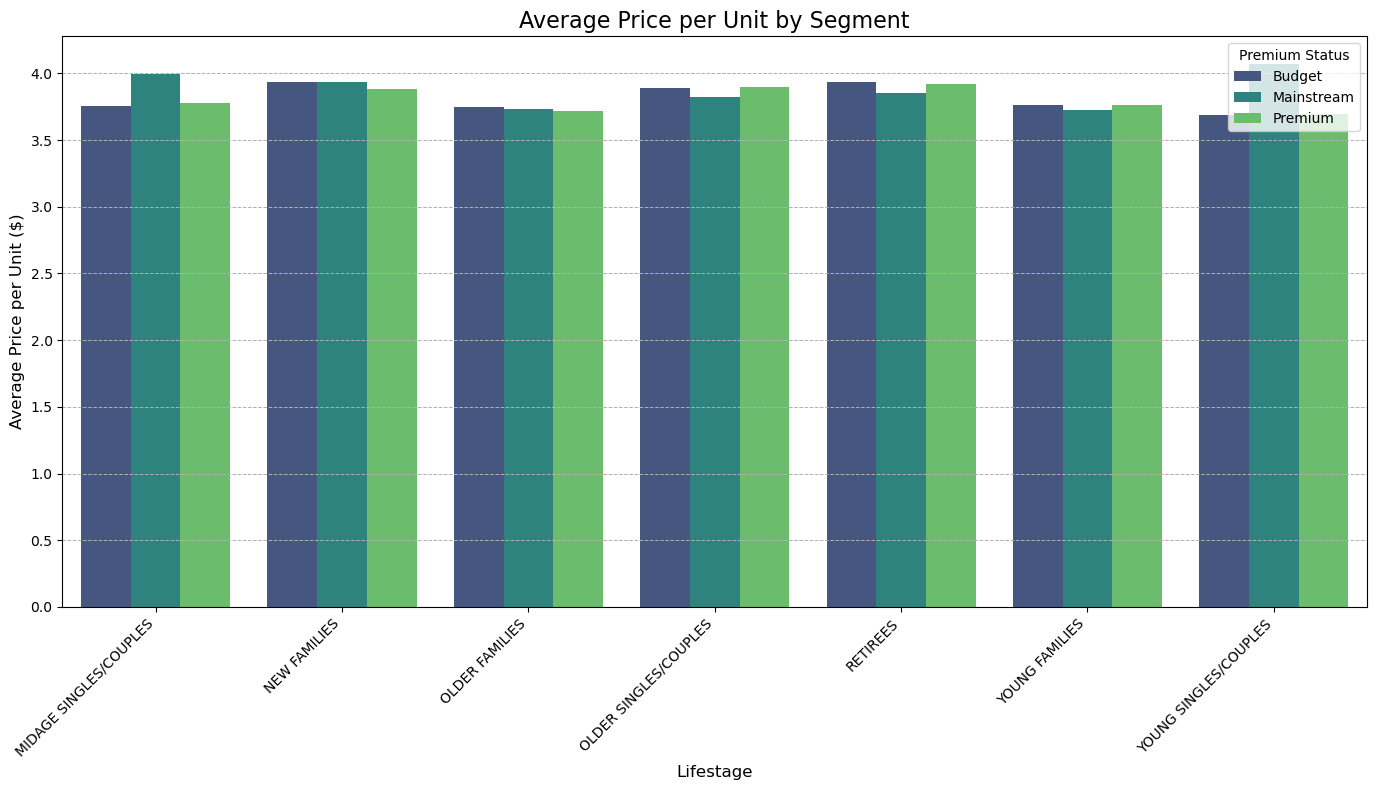

In [116]:
avg_price_by_segment = df_final_analysis.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_sales=('TOT_SALES', 'sum'),
    total_qty=('PROD_QTY', 'sum')
).reset_index()

# Calculate the average price per unit
avg_price_by_segment['AVG_PRICE_PER_UNIT'] = avg_price_by_segment['total_sales'] / avg_price_by_segment['total_qty']


# Step 2: Create the grouped bar chart.
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_price_by_segment, x='LIFESTAGE', y='AVG_PRICE_PER_UNIT', hue='PREMIUM_CUSTOMER', palette='viridis')

# Step 3: Format the plot.
plt.title('Average Price per Unit by Segment', fontsize=16)
plt.xlabel('Lifestage', fontsize=12)
plt.ylabel('Average Price per Unit ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Premium Status')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

plt.show()

**Key Finding: There is a clear and consistent pattern in the average price per unit across different segments. Mainstream customers within the "Young Singles/Couples" and "Midage Singles/Couples" lifestages are willing to pay a significantly higher price per unit (around $4.00) compared to other segments.**

**Insight: This directly explains why these segments contribute so much to total sales despite not having the highest purchase frequency. They are choosing to buy more expensive, premium-branded chips. This could be indicative of "impulse buying" or a preference for higher-quality products for social occasions.**

**Contrasting Behavior: Conversely, Budget and Premium customers within these same "Singles/Couples" lifestages tend to pay less per unit. This is also true for most "Families" and "Retirees," who consistently pay a lower average price per unit across all premium tiers.**

**Final Conclusion: The data strongly suggests that Mainstream - Young and Midage Singles/Couples are a key target segment for driving revenue through higher-margin products. While other segments like "Budget - Older Families" are important for volume, these mainstream singles/couples are crucial for profitability.**

**Deep-Dive on Brand Affinity**: **To calculate a "brand affinity" score for our target segment. This score will tell us if they are more or less likely to buy a particular brand compared to all other customers**

In [118]:
# Step 1: Define our target segment and split the data
target_mask = (df_final_analysis['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & \
              (df_final_analysis['PREMIUM_CUSTOMER'] == 'Mainstream')

target_segment = df_final_analysis[target_mask]
other_customers = df_final_analysis[~target_mask]

# Step 2: Calculate brand proportions for each group
target_brand_proportions = target_segment.groupby('BRAND_NAME')['PROD_QTY'].sum() / target_segment['PROD_QTY'].sum()
other_brand_proportions = other_customers.groupby('BRAND_NAME')['PROD_QTY'].sum() / other_customers['PROD_QTY'].sum()

# Step 3: Combine into a single DataFrame and calculate affinity
brand_affinity = pd.DataFrame({
    'Target_Proportion': target_brand_proportions,
    'Other_Proportion': other_brand_proportions
}).fillna(0) # Fill any missing brands with 0

brand_affinity['Affinity_Score'] = brand_affinity['Target_Proportion'] / brand_affinity['Other_Proportion']

# Step 4: Display the results, sorted by the highest affinity
print("--- Brand Affinity for Mainstream, Young Singles/Couples ---")
print(brand_affinity.sort_values(by='Affinity_Score', ascending=False))


--- Brand Affinity for Mainstream, Young Singles/Couples ---
                 Target_Proportion  Other_Proportion  Affinity_Score
BRAND_NAME                                                          
Tyrrells                  0.031553          0.025692        1.228095
Twisties                  0.046184          0.037877        1.219319
Doritos                   0.122761          0.101075        1.214553
Kettle                    0.197985          0.165553        1.195897
Tostitos                  0.045411          0.037978        1.195713
Pringles                  0.119420          0.100635        1.186670
Grain Waves               0.029124          0.025121        1.159318
Cobs                      0.044638          0.039049        1.143124
Infuzions                 0.064679          0.057065        1.133435
Thins                     0.060373          0.056986        1.059423
Cheezels                  0.017971          0.018647        0.963753
Smiths                    0.096370        

**Key Finding: This segment shows a strong and clear preference for certain brands. They are significantly more likely to purchase brands like Tyrrells, Twisties, Doritos, and Kettle than other customers. The affinity score for Tyrrells (1.22) indicates they are 22% more likely to buy this brand.**
                                                                                                                                                                                                                               
**Negative Affinity: Conversely, this segment is notably less likely to purchase other brands, including Smiths, Red Rock Deli, Natural Chip Co, and especially store-brand or generic products like Woolworths and Burger rings.**
                                                                                                                                                                                                                               
**Strategic Insight: This provides a powerful targeting opportunity. To appeal to this valuable, high-spending segment, marketing efforts, promotions, and in-store displays should prominently feature brands like Tyrrells, Doritos, and Kettle. Placing these specific brands in high-traffic areas frequented by younger shoppers could lead to a significant increase in sales. Conversely, brands like Smiths or Woolworths are less likely to resonate with this particular group.**

**Deep-Dive on Pack Size Affinity**:**To see if our target segment prefers different pack sizes compared to other customers.**

In [119]:
target_pack_proportions = target_segment.groupby('PACK_SIZE')['PROD_QTY'].sum() / target_segment['PROD_QTY'].sum()
other_pack_proportions = other_customers.groupby('PACK_SIZE')['PROD_QTY'].sum() / other_customers['PROD_QTY'].sum()

# Step 2: Combine into a single DataFrame and calculate affinity
pack_affinity = pd.DataFrame({
    'Target_Proportion': target_pack_proportions,
    'Other_Proportion': other_pack_proportions
}).fillna(0)

pack_affinity['Affinity_Score'] = pack_affinity['Target_Proportion'] / pack_affinity['Other_Proportion']

# Step 3: Display the results, sorted by the highest affinity
print("--- Pack Size Affinity for Mainstream, Young Singles/Couples ---")
print(pack_affinity.sort_values(by='Affinity_Score', ascending=False))

--- Pack Size Affinity for Mainstream, Young Singles/Couples ---
           Target_Proportion  Other_Proportion  Affinity_Score
PACK_SIZE                                                     
270.0               0.031829          0.025096        1.268287
380.0               0.032160          0.025584        1.257030
330.0               0.061284          0.050162        1.221717
134.0               0.119420          0.100635        1.186670
110.0               0.106280          0.089791        1.183637
210.0               0.029124          0.025121        1.159318
135.0               0.014769          0.013075        1.129511
250.0               0.014355          0.012781        1.123166
170.0               0.080773          0.080986        0.997370
150.0               0.157598          0.163421        0.964372
175.0               0.254990          0.270007        0.944382
165.0               0.055652          0.062268        0.893757
190.0               0.007481          0.012442       

In [ ]:
**Key Finding: This segment shows a clear preference for larger, more unique pack sizes. They are significantly more likely to purchase pack sizes like 270g, 380g, and 330g compared to other customers. The affinity score for the 270g pack (1.27) indicates they are 27% more likely to purchase this specific size.**
    
Negative Affinity: Conversely, this segment is less likely to purchase the most common, standard-sized bags, such as the 175g and 150g packs, which are popular among the general customer base.**
Strategic Insight for Julia: This reinforces the findings from the brand affinity analysis. This segment is not buying the standard, common products. They are drawn to more unique, often larger, and more expensive options. This could be for social gatherings or parties. To capture more sales from this valuable group, the category manager could strategically place larger, "party-sized" bags of their preferred brands (like Tyrrells and Doritos) in prominent, high-visibility locations.**